<a href="https://colab.research.google.com/github/barkhakabra24/DSML_Batch1/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette(sns.color_palette("BuGn_r", 1))

In [3]:
# Reading the csv file
dataset = pd.read_csv("netflix.csv")

In [4]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
dataset.info()
#  We can observe a lot of null values for columns like director,cast,country etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# CHeck the number of rows and columns
dataset.shape

(8807, 12)

### TV Shows vs Movies 

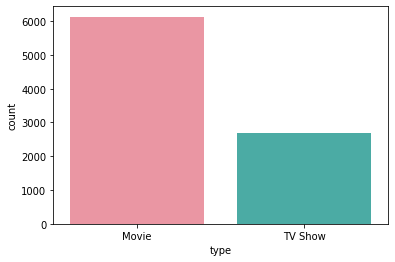

In [7]:
# Comparing the Tv vs Movies
sns.countplot(data=dataset, x="type")
plt.show()

In [8]:
dataset['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

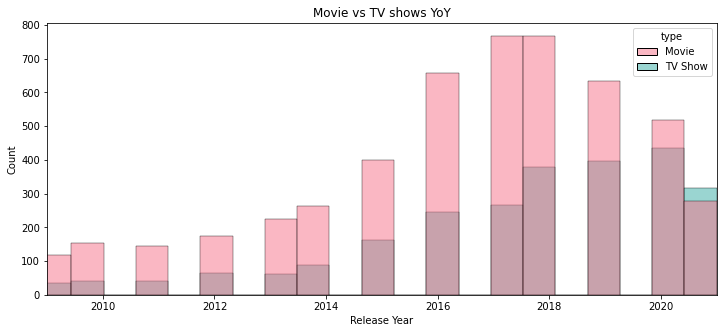

In [9]:
# Distribution of Movie and TV show YoY
plt.figure(figsize=(12,5))
sns.histplot(data=dataset,x="release_year",hue="type")
plt.xlim(left=2009,right=2021)
plt.xlabel('Release Year')
plt.title("Movie vs TV shows YoY")
plt.show()

In [10]:
print(dataset.loc[dataset["release_year"] == 2021]["type"].value_counts())

TV Show    315
Movie      277
Name: type, dtype: int64


Now a days TV shows are more trending that can be observed by the fact that counts of TV is increasing YoY. Netflix used to focus more on movies, but the recent trends shows more TV series are getting added to netflix every year, and for year 2021 number of TV shows surpasses the number of movie released.

In [11]:
df_movie = dataset.loc[dataset["type"] == "Movie"].copy()
df_show = dataset.loc[dataset["type"] == "TV Show"].copy()

# Movies

In [12]:
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


#### Check for null values

In [13]:
df_movie.isna().sum()/df_movie.shape[0]*100

show_id         0.000000
type            0.000000
title           0.000000
director        3.066384
cast            7.747513
country         7.176643
date_added      0.000000
release_year    0.000000
rating          0.032621
duration        0.048932
listed_in       0.000000
description     0.000000
dtype: float64

In [14]:
df_movie.dropna(inplace=True)

#### Movie Duration 

In [15]:
df_movie["duration"] = df_movie["duration"].apply(lambda x: int(x.split()[0]))

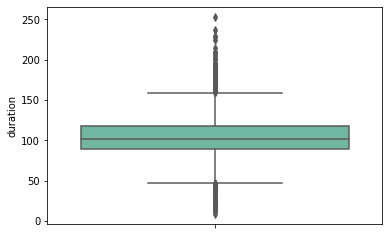

In [16]:
# Checking the distribution of duration for  Movies 
sns.boxplot(y="duration",data=df_movie)
plt.show()

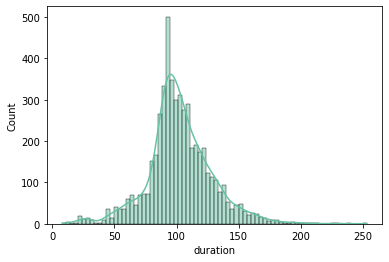

In [111]:
sns.histplot(df_movie['duration'],kde=True)

In [18]:
df_movie["duration"].describe()
# Here we can see mean and median is almost equal and showcasing that the plot is Normally distributed

count    5185.000000
mean      102.701446
std        25.962914
min         8.000000
25%        89.000000
50%       101.000000
75%       117.000000
max       253.000000
Name: duration, dtype: float64

In [19]:
# smallest duration movie on netflix
df_movie.loc[df_movie["duration"] == df_movie["duration"].min()]
# Minimun duration is 8 mins

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,"December 28, 2020",2020,PG-13,8,Dramas,Animation and activism unite in this multimedi...


In [20]:
# largest duration movie on netflix
df_movie.loc[df_movie["duration"] == df_movie["duration"].max()]
# Maxing duration is 253

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2491,s2492,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,TV-14,253,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...


#### Long-Short Movies 

In [21]:
# Movies with less than 30 minutes
under_30_mins_movie = df_movie.loc[df_movie["duration"] < 30]

#### Diving Movies based on Ratings

In [22]:
under_30_mins_movie['rating'].unique()

array(['TV-PG', 'TV-G', 'TV-MA', 'TV-Y', 'PG-13', 'TV-14', 'TV-Y7'],
      dtype=object)

In [23]:
df_movie['rating'].unique()

array(['TV-MA', 'PG-13', 'TV-14', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

Here the rating is based on **Motion Picture Association film rating system**
A quick guide for the same is : https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system
For Nextflix, the article is I am refering to is : https://help.netflix.com/en/node/2064/us

## Kids
TV-Y :  Designed to be appropriate for all children
TV-Y7 : Suitable for ages 7 and up
G : Suitable for General Audiences
TV-G : Suitable for General Audiences
PG : Parental Guidance suggested
TV-PG : Parental Guidance suggested
TV-Y7-FV : Suitable for ages 7 and up Fantasy Volience

## Teens
PG-13 : Parents strongly cautioned. May be inappropriate for ages under 13.
TV-14 : Parents strongly cautioned. May not be suitable for ages under 14.

## Adults
R : Restricted. May be inappropriate for ages under 17.
TV-MA : For Mature Audiences
NC-17 : Inappropriate for ages 17 and under

For now we can ignore :: 
NR  : (Not Rated) is for movies with added scenes that theaters won't allow.
UR  : (Un-rated) is for movies with added scenes that theaters won't allow, that also contain penetration.

In [24]:
movie_ratings = {
    "kids": ['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],
    "teens": ['PG-13','TV-14'],
    "adults": ['R','TV-MA','NC-17']
}

In [25]:
short_movies_rated={
    "kids":0,
    "teens":0,
    "adults":0
}

In [26]:
for rating in under_30_mins_movie["rating"]:
    if rating in movie_ratings["kids"]:
        short_movies_rated["kids"] += 1
    elif rating in movie_ratings["teens"]:
        short_movies_rated["teens"] += 1
    elif rating in movie_ratings["adults"]:
        short_movies_rated["adults"] += 1

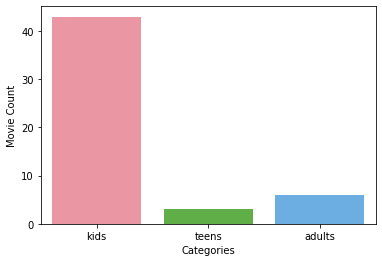

In [27]:
sns.barplot(x=list(short_movies_rated.keys()), y=list(short_movies_rated.values()))
plt.xlabel('Categories')
plt.ylabel('Movie Count')
plt.show()

In [28]:
short_movies_rated

{'kids': 43, 'teens': 3, 'adults': 6}

In [29]:
# Movies of more than 180 mins i.e. 3 hrs
over_180_mins_movie = df_movie.loc[df_movie["duration"] > 180]

In [30]:
long_movie_rated = {
    "kids":0,
    "teens":0,
    "adults":0
}

In [31]:
for rating in over_180_mins_movie["rating"]:
    if rating in movie_ratings["kids"]:
        long_movie_rated["kids"] += 1
    elif rating in movie_ratings["teens"]:
        long_movie_rated["teens"] += 1
    elif rating in movie_ratings["adults"]:
        long_movie_rated["adults"] += 1

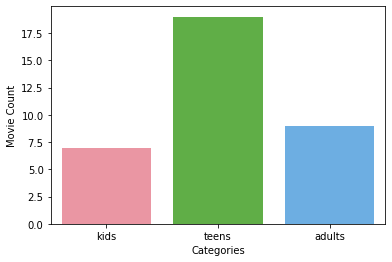

In [32]:
sns.barplot(x=list(long_movie_rated.keys()), y=list(long_movie_rated.values()))
plt.xlabel('Categories')
plt.ylabel('Movie Count')
plt.show()

We can infer from the above two graphs, majority of the **short movies are rated for kids** and most of the **long movies are rated for the teenagers**

#### Duration and Directors 

In [33]:
top_long_movie_dirc = over_180_mins_movie["director"].value_counts().head()

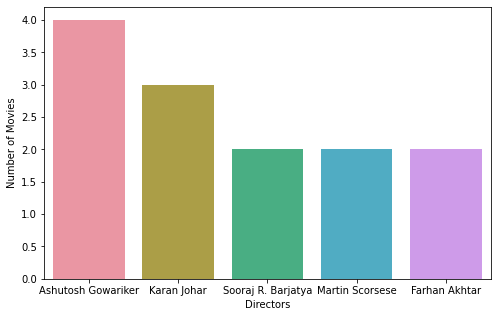

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_long_movie_dirc.index, y=top_long_movie_dirc.values)
plt.xlabel("Directors")
plt.ylabel("Number of Movies")
plt.show()

**Ashutosh Gowariker** tops the chart in making long movies, followed by **Karan Johar**.

#### Movie Released 

In [35]:
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103,Comedies,Mourning the loss of their beloved junior high...


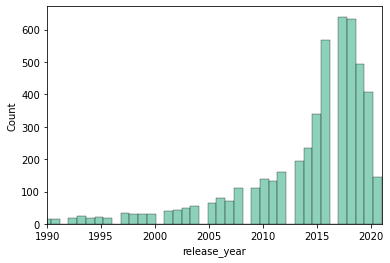

In [36]:
# Number of movies released in last 30 years
sns.histplot(x="release_year", data=df_movie)
plt.xlim(1990, 2021)
plt.show()

In [37]:
print(f"Number of movies released in 1990 : {df_movie.loc[df_movie['release_year'] == 1990].shape[0]}")
print(f"Number of movies released in 2020 : {df_movie.loc[df_movie['release_year'] == 2020].shape[0]}")

Number of movies released in 1990 : 16
Number of movies released in 2020 : 409


Movies releasing per year has increased drastically.
    
    - Moives released in 1990 : 16
    - Movies released in 2020 : 409
    
 

#### Based on Countries  Analysis

In [38]:
df_country = df_movie.assign(country=df_movie['country'].str.split(", ")).explode('country')

In [39]:
df_country["country"].value_counts()

United States     2444
India              932
United Kingdom     461
Canada             287
France             285
                  ... 
Paraguay             1
Albania              1
Georgia              1
Slovakia             1
Montenegro           1
Name: country, Length: 113, dtype: int64

In [40]:
# Checking the top 5 countries
top_countries = df_country["country"].value_counts().head()

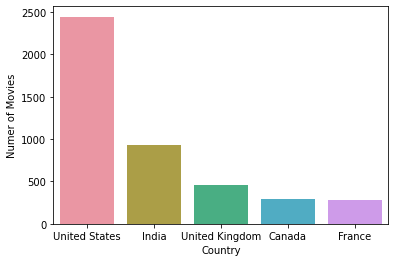

In [41]:
sns.barplot(x=list(top_countries.index), y=list(top_countries.values))
plt.xlabel("Country")
plt.ylabel("Numer of Movies")
plt.show()

Most of the movies in Netflix are producted from United States followed by India and United Kingdom but again with a big margin.
**US has produced more movies than all other top four countries combined.**

In [42]:
top_countries

United States     2444
India              932
United Kingdom     461
Canada             287
France             285
Name: country, dtype: int64

#### Country and Directors

In [43]:
df_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [44]:
# list(df_country['director'].unique())

In [45]:
# Some of the Movie has more than one director
df_director = df_country.assign(director=df_country['director'].str.split(", ")).explode('director')
grp_country_director = df_director.groupby(["country","director"])["title"].count().sort_values(ascending=False)

In [46]:
grp_country_director.head()

country        director           
United States  Jay Karas              15
               Marcus Raboy           14
Philippines    Cathy Garcia-Molina    13
Mexico         Jan Suter              12
United States  Martin Scorsese        12
Name: title, dtype: int64

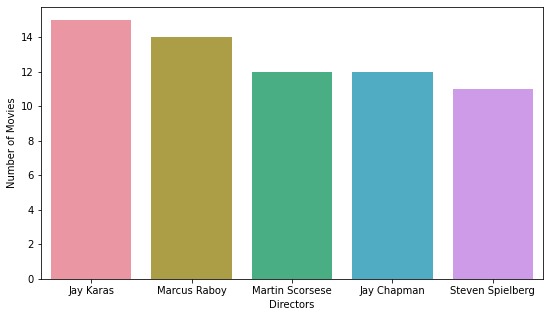

In [47]:
# Most movies directed in USA
plt.figure(figsize=(9,5))
sns.barplot(x=list(grp_country_director["United States"].head().index),y=list(grp_country_director["United States"].head().values))
plt.xlabel("Directors")
plt.ylabel("Number of Movies")
plt.show()

In US, most number of movies are directed by **Jay Karas**  , closely followed by **Marcus Raboy**

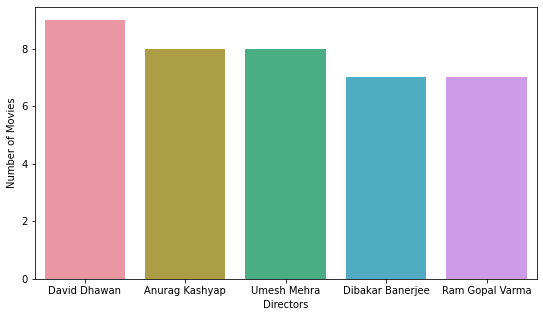

In [48]:
# Most movies directed in India
plt.figure(figsize=(9,5))
sns.barplot(x=list(grp_country_director["India"].head().index),y=list(grp_country_director["India"].head().values))
plt.xlabel("Directors")
plt.ylabel("Number of Movies")
plt.show()

In India, most number of movies are directed by **David Dhawan**, closely followed by **Anurag Kashyap**

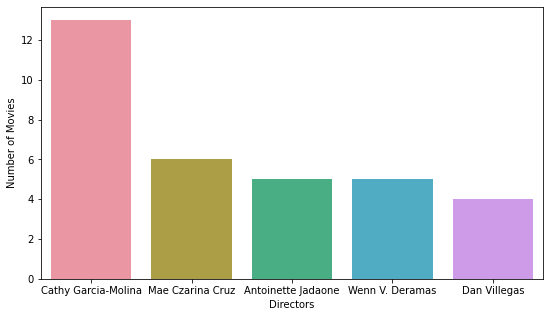

In [49]:
# Most movies directed in Philippines
plt.figure(figsize=(9,5))
sns.barplot(x=list(grp_country_director["Philippines"].head().index),y=list(grp_country_director["Philippines"].head().values))
plt.xlabel("Directors")
plt.ylabel("Number of Movies")
plt.show()

In Philippines, most number of movies are directed by Cathy Garcia-Molina

#### Directors and Genre 

In [50]:
df_genre = df_movie.assign(listed_in=df_movie['listed_in'].str.split(", ")).explode('listed_in')

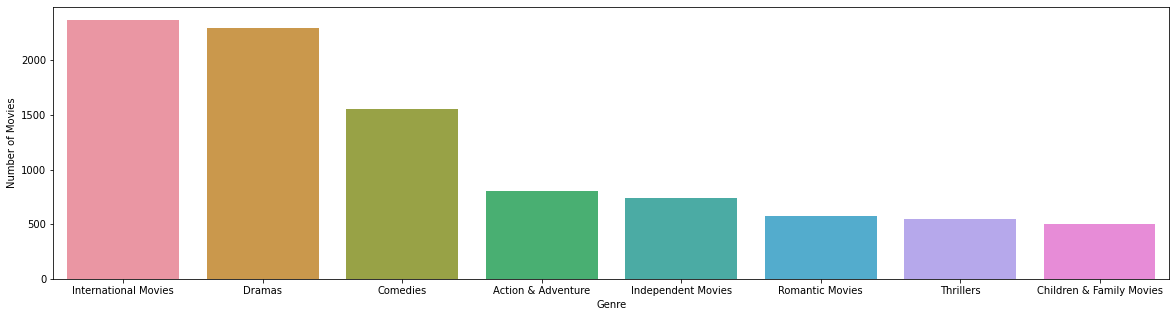

In [51]:
# Most movies directed in USA
plt.figure(figsize=(20,5))
sns.barplot(x=list(df_genre["listed_in"].value_counts().head(8).index),y=list(df_genre["listed_in"].value_counts().head(8).values))
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

Top 8 Genre of movies available on Netflix. People likes to watch **International Movies, Dramas and Comedies**.
Let us check the top directors in these categories

In [52]:
grp_genre_director = df_genre.groupby(["listed_in","director"])["title"].count().sort_values(ascending=False)

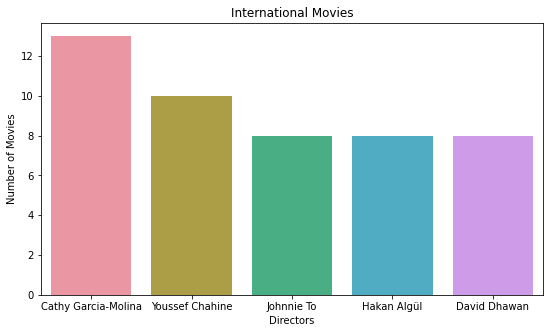

In [53]:
# Top directors in International Movies
plt.figure(figsize=(9,5))
sns.barplot(x=list(grp_genre_director["International Movies"].head().index),y=list(grp_genre_director["International Movies"].head().values))
plt.xlabel("Directors")
plt.ylabel("Number of Movies")
plt.title("International Movies")
plt.show()

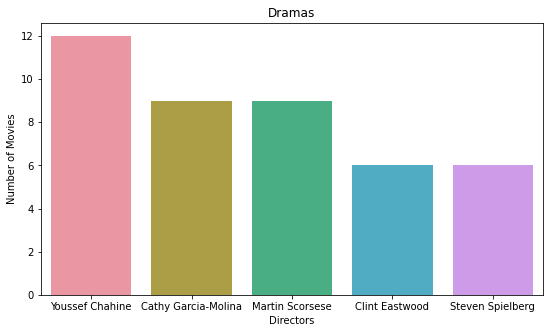

In [54]:
# Top directors in Dramas
plt.figure(figsize=(9,5))
sns.barplot(x=list(grp_genre_director["Dramas"].head().index),y=list(grp_genre_director["Dramas"].head().values))
plt.xlabel("Directors")
plt.ylabel("Number of Movies")
plt.title("Dramas")
plt.show()

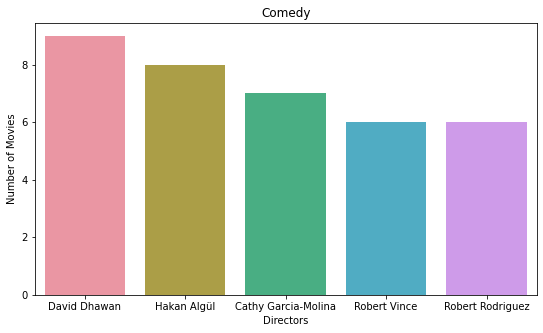

In [55]:
# Top directors in Comedies
plt.figure(figsize=(9,5))
sns.barplot(x=list(grp_genre_director["Comedies"].head().index),y=list(grp_genre_director["Comedies"].head().values))
plt.xlabel("Directors")
plt.ylabel("Number of Movies")
plt.title("Comedy")
plt.show()

#### Directors and Cast in India

In [56]:
df_movie_india = df_country[df_country["country"] == "India"]
df_movie_india = df_movie_india.assign(director=df_movie_india['director'].str.split(", ")).explode('director')
df_cast = df_movie_india.assign(cast=df_movie_india['cast'].str.split(", ")).explode('cast')

In [57]:
grp_director_cast = df_cast.groupby(["director","cast"])["title"].count().sort_values(ascending=False)

In [58]:
top_directors_in_india = list(grp_country_director["India"].head().index)

In [59]:
top_directors_in_india

['David Dhawan',
 'Anurag Kashyap',
 'Umesh Mehra',
 'Dibakar Banerjee',
 'Ram Gopal Varma']

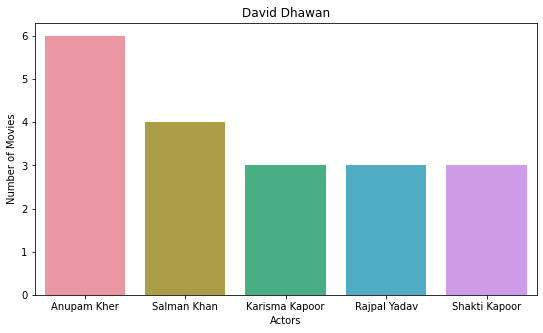

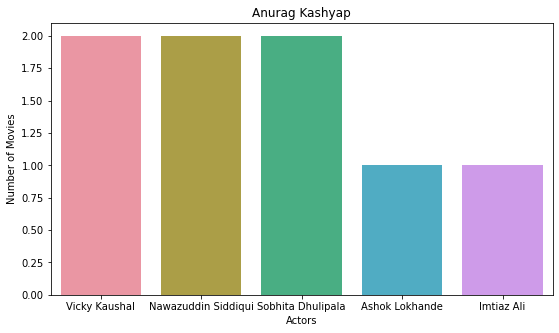

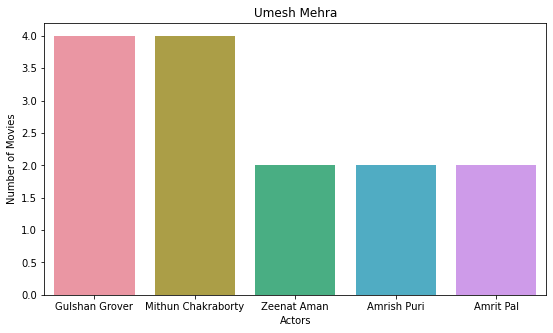

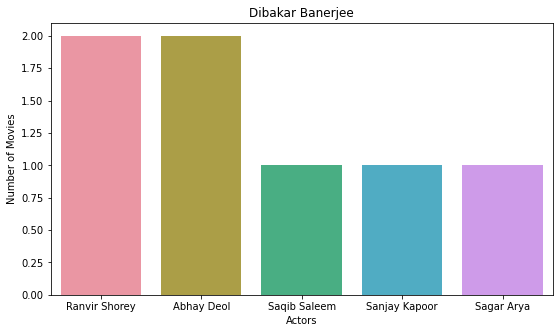

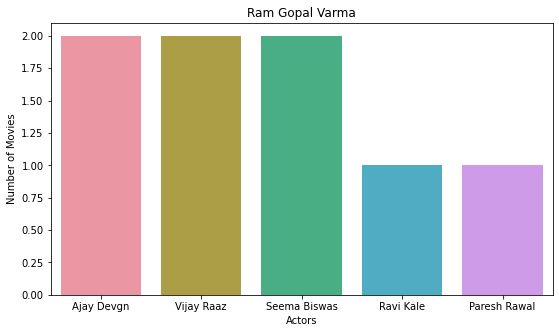

In [60]:
#  Actors/Cast for each of the Directors
for director in top_directors_in_india:
    plt.figure(figsize=(9,5))
    sns.barplot(x=list(grp_director_cast[director].head().index),y=list(grp_director_cast[director].head().values))
    plt.xlabel("Actors")
    plt.ylabel("Number of Movies")
    plt.title(director)
    plt.show()

#### Country and Genre 

In [61]:
df_country_genre = df_country.assign(listed_in=df_country['listed_in'].str.split(", ")).explode('listed_in')

In [62]:
df_country_genre = df_country_genre.loc[df_country_genre["country"].isin(list(top_countries.index))]

In [63]:
top_country_genre = df_country_genre.groupby(["country"])["listed_in"].value_counts().groupby(level=0).head(3).sort_values(ascending=False).to_frame("counts").reset_index()

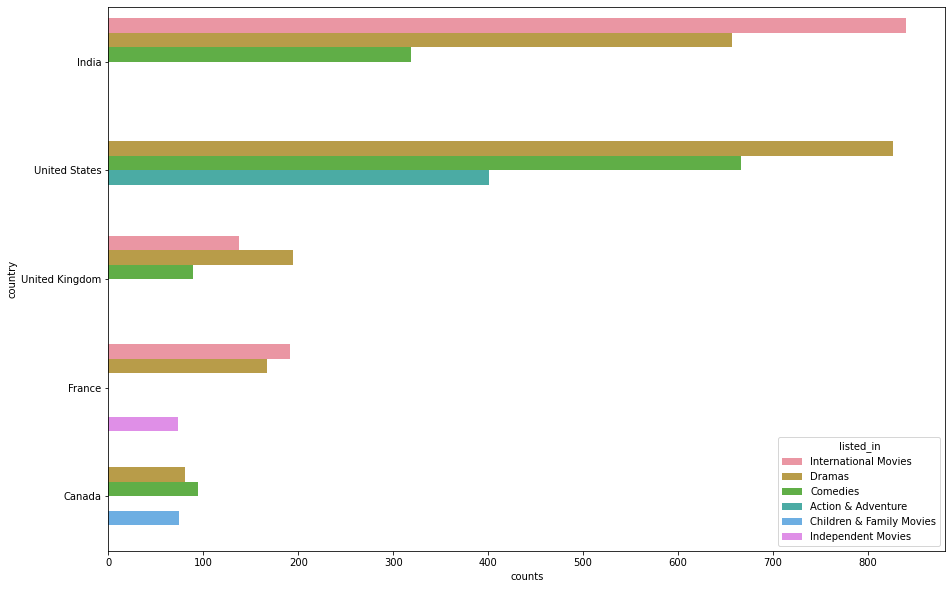

In [64]:
plt.figure(figsize=(15,10))
sns.barplot(y="country", x="counts", data=top_country_genre, hue="listed_in")

#### Best time to launch the Movie

In [65]:
df_movie.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [66]:
df_movie["date_added"] = pd.to_datetime(df_movie["date_added"])

In [67]:
df_movie["month"] = df_movie["date_added"].dt.strftime('%b')

In [68]:
movie_month = df_movie["month"].value_counts().reset_index().rename(columns = {'index' : 'month', 'month' : 'count'})

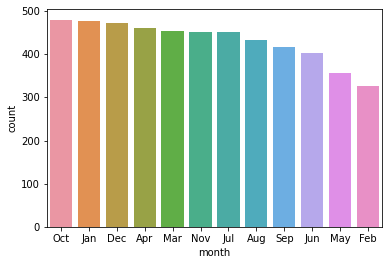

In [69]:
sns.barplot(data=movie_month, x="month", y="count")

Most directors like to launch their Movies in the month of Oct|Jan and Dec, because of the holiday season (Christmas , Halloween and Also Diwali)
High Seasonality trends here - To increase the viewership

In [70]:
df_movie['dayOfWeek'] = df_movie['date_added'].dt.day_name()

In [71]:
movie_day = df_movie["dayOfWeek"].value_counts().reset_index().rename(columns = {'index' : 'Day', 'dayOfWeek' : 'count'})

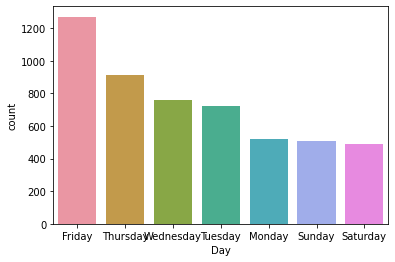

In [72]:
sns.barplot(data=movie_day, x="Day", y="count")

Here Again because of weekends, Most of the movies are released during Friday on Netflix

### TV Shows 

In [73]:
df_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


#### Check NaN values 

In [74]:
df_show.isna().sum()/df_show.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        91.405082
cast            13.079223
country         14.611360
date_added       0.373692
release_year     0.000000
rating           0.074738
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

We can see there are more than 90% TV Shows for which directors name is missing. We can remove this feature from this dataset as this will not help us much in getting the insights for TV shows.

For others we can remove the rows for which values are missing.

In [75]:
df_show.drop(columns=["director"], axis=1, inplace=True)

In [76]:
df_show.dropna(inplace=True)

In [77]:
df_show.head()
# Here duration is suggesting us the Seasons details

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
8,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
15,s16,TV Show,Dear White People,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
17,s18,TV Show,Falsa identidad,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...


#### Duration/Season Analysis

In [78]:
df_show["duration"] = df_show["duration"].apply(lambda x: int(x.split()[0]))

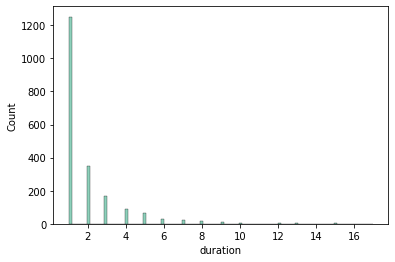

In [79]:
sns.histplot(df_show["duration"])
plt.show()

In [80]:
df_show["duration"].describe()

count    2013.000000
mean        1.905614
std         1.696984
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration, dtype: float64

In [81]:
df_show.loc[df_show["duration"] == df_show["duration"].max()]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...


We can observe most of the TV Shows consist of only 1 season. 75% of the shows consist of upto 2 seasons. 

Longest TV show on Netflix is Grey's Anatomy with 17 seasons 

#### Trends of TV Shows 

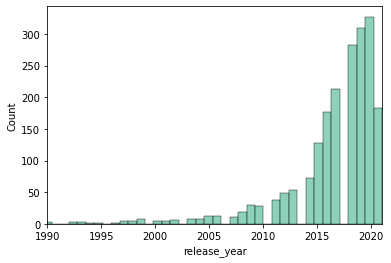

In [82]:
sns.histplot(df_show["release_year"])
plt.xlim(1990,2021)
plt.show()

We can see the number of TV shows released every has increased rapidly.  

In [83]:
df_show["rating"].unique()

array(['TV-MA', 'TV-14', 'TV-Y7', 'TV-PG', 'TV-Y', 'TV-G', 'NR', 'R',
       'TV-Y7-FV'], dtype=object)

In [84]:
show_ratings = {
    "kids": ['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],
    "teens": ['PG-13','TV-14'],
    "adults": ['R','TV-MA','NC-17','NR']
}

In [85]:
def add_rating_groups(x):
    if x in show_ratings["kids"]:
        return "kids"
    elif x in show_ratings["teens"]:
        return "teens"
    elif x in show_ratings["adults"]:
        return "adults"

In [86]:
df_show["rating_groups"] = df_show["rating"].apply(add_rating_groups)

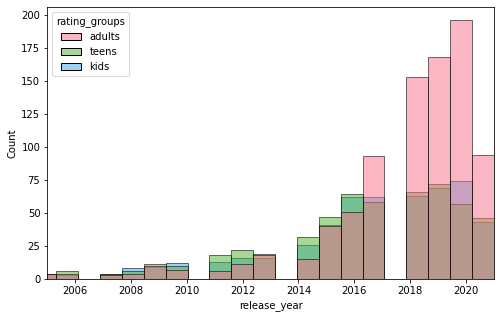

In [87]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_show, x="release_year", hue="rating_groups")
plt.xlim(2005, 2021)
plt.show()

TV shows rated for adults are becoming more popular and directors are preferring to target **adults** as there audiance than **kids or teens**

#### Top Countries in TV Shows 

In [88]:
df_show_country = df_show.assign(country=df_show['country'].str.split(", ")).explode('country')

In [89]:
top_show_country = list(df_show_country["country"].value_counts().head().index)

In [90]:
top_show_country

['United States', 'United Kingdom', 'Japan', 'South Korea', 'Canada']

In [91]:
df_show_top_country = df_show_country.loc[df_show_country["country"].isin(top_show_country)]

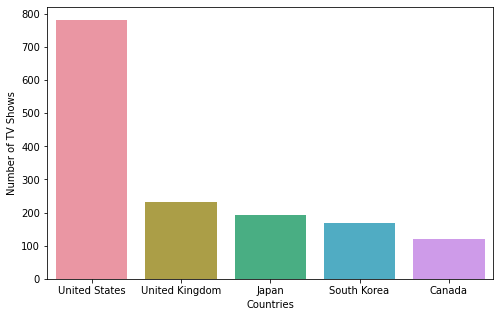

In [92]:
plt.figure(figsize=(8,5))
sns.barplot(y=df_show_top_country["country"].value_counts().values, x=top_show_country)
plt.xlabel("Countries")
plt.ylabel("Number of TV Shows")
plt.show()

Maximum number of TV shows are produced in United States followed by United Kingdom sames observation we saw for Movies as well

In [93]:
grp_show_country_rating = df_show_top_country.groupby("country")["rating_groups"].value_counts().sort_values(ascending=False).to_frame("count").reset_index()

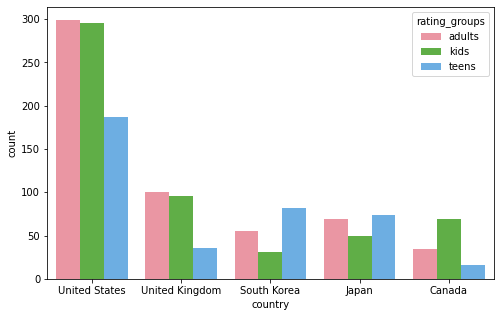

In [94]:
plt.figure(figsize=(8,5))
sns.barplot(data=grp_show_country_rating, x="country", y="count", hue="rating_groups")
plt.show()

We can see United States and United Kingdom goes with the overall trend of adult and kids rated TV shows, but South Korea and Japan shows some different trend. They produce more shows for teens than adults

In [95]:
df_show_jpn_sko = df_show_country.loc[df_show_country["country"].isin(["Japan","South Korea"])]

In [96]:
df_show_jpn_sko = df_show_jpn_sko.assign(listed_in=df_show_jpn_sko['listed_in'].str.split(", ")).explode('listed_in')

In [97]:
grp_show_jpn_sko = df_show_jpn_sko.groupby("rating_groups")["listed_in"].value_counts(ascending=False).groupby(level=0).head().to_frame("count").reset_index()

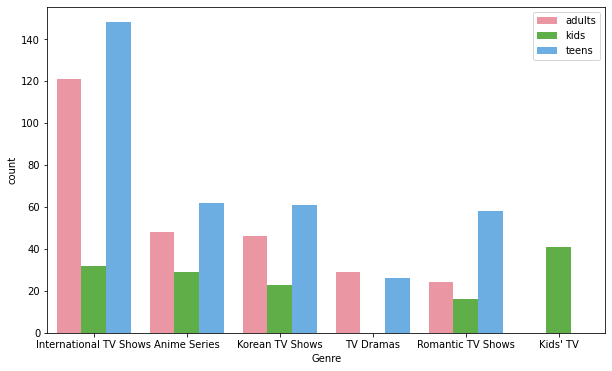

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(data=grp_show_jpn_sko, x = "listed_in", y="count", hue="rating_groups")
plt.legend(loc="upper right")
plt.xlabel("Genre")
plt.show()

Top watched TV show genre in Japan and South Korea are International TV Shows and Anime Series. 4 of the top 6 genre in Japan and South Korea are rated for teens.

In [99]:
df_show_us_uk = df_show_country.loc[df_show_country["country"].isin(["United States","United Kingdom"])]

In [100]:
df_show_us_uk = df_show_us_uk.assign(listed_in=df_show_us_uk['listed_in'].str.split(", ")).explode('listed_in')
grp_show_us_uk = df_show_us_uk.groupby("rating_groups")["listed_in"].value_counts(ascending=False).groupby(level=0).head().to_frame("count").reset_index()

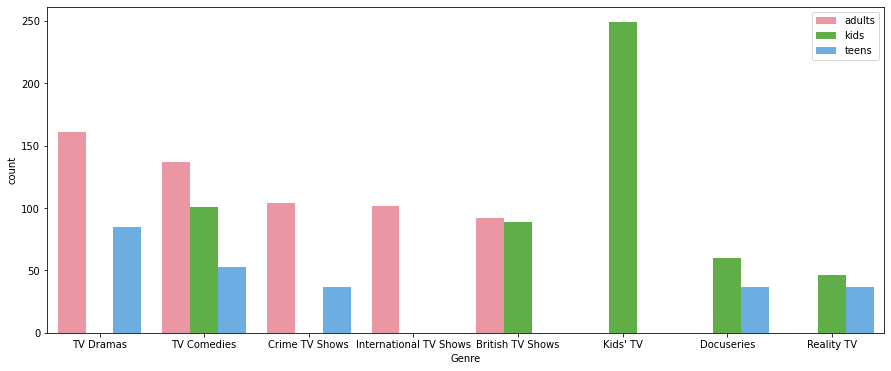

In [101]:
plt.figure(figsize=(15,6))
sns.barplot(data=grp_show_us_uk, x = "listed_in", y="count", hue="rating_groups")
plt.legend(loc="upper right")
plt.xlabel("Genre")
plt.show()

Most of the genres United States and United Kingdom are targeted for adults. Their top genres are TV Dramas, TV Comedies and Crime TV Shows

#### Best time to launch TV Show 

In [102]:
df_show["date_added"] = pd.to_datetime(df_show["date_added"])

In [103]:
df_show["month"] = df_show["date_added"].dt.strftime('%b')

In [104]:
show_month = df_show["month"].value_counts().reset_index().rename(columns = {'index' : 'month', 'month' : 'count'})

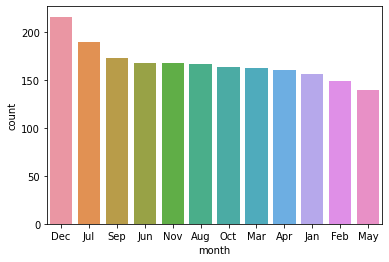

In [105]:
sns.barplot(data=show_month, x="month", y="count")

Seasonality/Holiday Sprits :  Most directors like to launch their TV shows in the month of December, because of the holiday season there is a possibility of high viewership in this month.

In [106]:
df_show['dayOfWeek'] = df_show['date_added'].dt.day_name()

In [107]:
df_show.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_groups,month,dayOfWeek
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",adults,Sep,Friday
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,adults,Sep,Friday
8,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,teens,Sep,Friday
15,s16,TV Show,Dear White People,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,adults,Sep,Wednesday
17,s18,TV Show,Falsa identidad,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,2021-09-22,2020,TV-MA,2,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,adults,Sep,Wednesday


In [108]:
df_show["dayOfWeek"].value_counts()

Friday       701
Tuesday      281
Thursday     273
Wednesday    237
Saturday     214
Monday       164
Sunday       143
Name: dayOfWeek, dtype: int64

In [109]:
show_dayOfWeek = df_show["dayOfWeek"].value_counts().reset_index().rename(columns = {'index' : 'Day', 'dayOfWeek' : 'count'})
show_dayOfWeek

,Day,count
0,Friday,701
1,Tuesday,281
2,Thursday,273
3,Wednesday,237
4,Saturday,214
5,Monday,164
6,Sunday,143


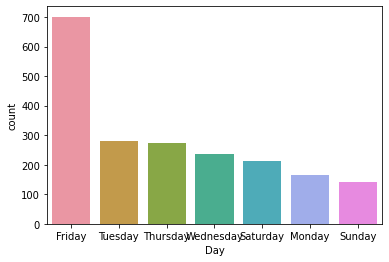

In [110]:
sns.barplot(data=show_dayOfWeek, x="Day", y="count")

Most directors like to launch their TV shows on Friday, because of the **weekends**
Incrasing the possibility of high viewership during Saturday and Sunday

***
### Insights and Recommendation 

1. There are more movies than TV shows on Netflix, but on checking the last 10 years' trend we found people are liking TV Shows more and in the year 2021 more TV Shows were released than Movies. 
**Recommendation:** Netflix should try to focus more on the TV Shows, as people are interested in watching them

2. Short movies(movies under 30 mins): We can get multiple movies under this category. Most of the movies in this category are specifically targeted at kids.<br>
**Recommendation:** If any director is making kids-specific movies they should keep the movie for around 30 mins.

3. Long movies(movies above 180 mins): There are few movies on Netflix of more than 3+ hrs mostly targeting teens and adult audiences. Few Indian directors are fond of making long movies and Ashutosh Gowariker has topped the charts with the maximum number of 3hrs+ duration od movies.<br>
**Recommendation:** Indian audience is interested in watching long movies and specifically if it is from Ashutosh
Gowariker, Karan Johar, Sooraj R. Barjatya and Farhan Akhtar

4. There is a major increase in the number of movies released in a year in the past 30 years. There were around 16 movies were released in 1990 and in the year 2020 this number has reached 409. Most of the Movies released are in the month of **Oct,Dec and Jan** and on **Friday** because of the holiday and seasonality spirit.

5. The United States has produced the most number of movies on Netflix. Followed by India and United Kingdom by a big margin. US has produced more movies than all other top four countries combined.
**Recommendation:** People like to watch movies produced in United States more. We can add more movies that are being produced in United States and during Friday to get more and more viewerships

6. Most liked Indian directors on Netflix are David Dhawan and Anurag Kashyap
**Recommendation:** There are high chances if the movies are directed by David Dhawan and Anurag Kashyap, people will like it in India. 

7. Most liked United States directors on Netflix are Jay Karas and Marcus Raboy
**Recommendation:** There are high chances if the movies are directed by Jay Karas and Marcus Raboy, people will like it in United States.

8. Most liked genres for movies on Netflix are International Movies, Dramas, and Comedies

9. Viewers love these genres when the movie is directed by Cathy Garcia-Molina, Youssef Chahine, and David Dhawan for respective genres.
**Recommendation:** People like to watch movies on International Movies, Dramas, and Comedies specially when it is directed by Cathy Garcia-Molina, Youssef Chahine, and David Dhawan.

10. Viewers like to watch movies with these combinations of directors and cast<br>
David Dhawan - Anupam Kher<br>
Anurag Kashyap - Vicky Kaushal, Nawazuddin Siddiqui<br>
Umesh Mehra - Gulshan Grover, Mithun Chakraborty<br>
Dibakar Banerjee - Ranvir Shorey<br>
Ram Gopal Varma - Ajay Devgn<br>
**Recommendation:** People like to watch movies of above combinations of directors and actors

11. Movie Genre - International Movies, Dramas, and Comedies are loved by the Indian audience on the other hand people from the United States like more of Dramas, Comedies, and Action & Adventure
**Recommendation:** Indian directors can target genres such as International Movies, Dramas, and Comedies for there movies as there is high possibility people might like this.

12. Viewers, in general, prefer not very long TV shows, they prefer to watch TV shows of 1-5 seasons
**Recommendation:** Directors should keep this on mind while making TV shows, that most people like to watch shorter TV shows.

13. Longest TV show on Netflix is Grey's Anatomy with 17 seasons

14. We can see, in recent times TV shows rated for adults are becoming more popular and directors are preferring to target adults as their audience than kids or teens
**Recommendation:** TV shows rated for adult are becoming more popular than for teens or kids. Netflix can add more shows rated for adults 

15. People of the United States and the United Kingdom like to watch TV shows more than other countries

16. Top watched TV show genres in Japan and South Korea are International TV Shows and Anime Series. 4 of the top 6 genres in Japan and South Korea are rated for teens.
**Recommendation:** Japan and South Korea prefers watching International TV shows and Anime Series

17. Most of the TV show genres in the United States and the United Kingdom are targeted at adults. Their top genres are TV Dramas, TV Comedies, and Crime TV Shows
**Recommendation:** United States and United Kingdom prefers watching dramas and TV comedies

18. Most directors like to launch their TV shows in the month of December
**Recommendation:** Directors prefer to launch their TV shows in the month of December, because of the holiday season there is a possibility of high viewership in this month.